In [15]:
# for basic API Request (Python)
# pip install requests
import requests

response = requests.get("https://jsonplaceholder.typicode.com/posts/1")
print(response.json())

{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


In [ ]:
# Web Scrapping for Data Collection
# pip install BeautifulSoup
import bs4 import BeautifulSoup
import requests

url = "https://quotes.toscrape.com"
page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")
print(soup.title.text)

In [2]:
import pandas as pd
import numpy as np

# creating a dataset with missing values....
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Age": [25, np.nan, 30, np.nan, 40],
    "Salary": [50000, 60000, np.nan, 80000, 90000],
    "Department": ["HR", "IT", "Finance", np.nan,"Marketing"]
}
df = pd.DataFrame(data)
# or
# df = pd.read_csv("Dataset_file.csv")
print(df)

      Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob   NaN  60000.0         IT
2  Charlie  30.0      NaN    Finance
3    David   NaN  80000.0        NaN
4      Eve  40.0  90000.0  Marketing


In [3]:
# Task 1: Dropping missing values
df_dropna = df.dropna()  # removes all rows that have nan values...
print("After Dropping :-")
print(df_dropna)

After Dropping :-
    Name   Age   Salary Department
0  Alice  25.0  50000.0         HR
4    Eve  40.0  90000.0  Marketing


In [4]:
# Task 2: Filling missing values with their mean
df_fillna_mean = df.copy()
df_fillna_mean.fillna(df_fillna_mean.mean(numeric_only=True),inplace=True)

print("After filling dataset by mean :-")
print(df_fillna_mean)

After filling dataset by mean :-
      Name        Age   Salary Department
0    Alice  25.000000  50000.0         HR
1      Bob  31.666667  60000.0         IT
2  Charlie  30.000000  70000.0    Finance
3    David  31.666667  80000.0        NaN
4      Eve  40.000000  90000.0  Marketing


In [5]:
# Task 3: Forward Filling missing values (ffill)
df_ffill = df.copy()
df_ffill.fillna(method='ffill',inplace=True)

print("After Forward Fill :-")
print(df_ffill)

After Forward Fill :-
      Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob  25.0  60000.0         IT
2  Charlie  30.0  60000.0    Finance
3    David  30.0  80000.0    Finance
4      Eve  40.0  90000.0  Marketing


C:\Users\iamha\AppData\Local\Temp\ipykernel_6988\2509817465.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill.fillna(method='ffill',inplace=True)


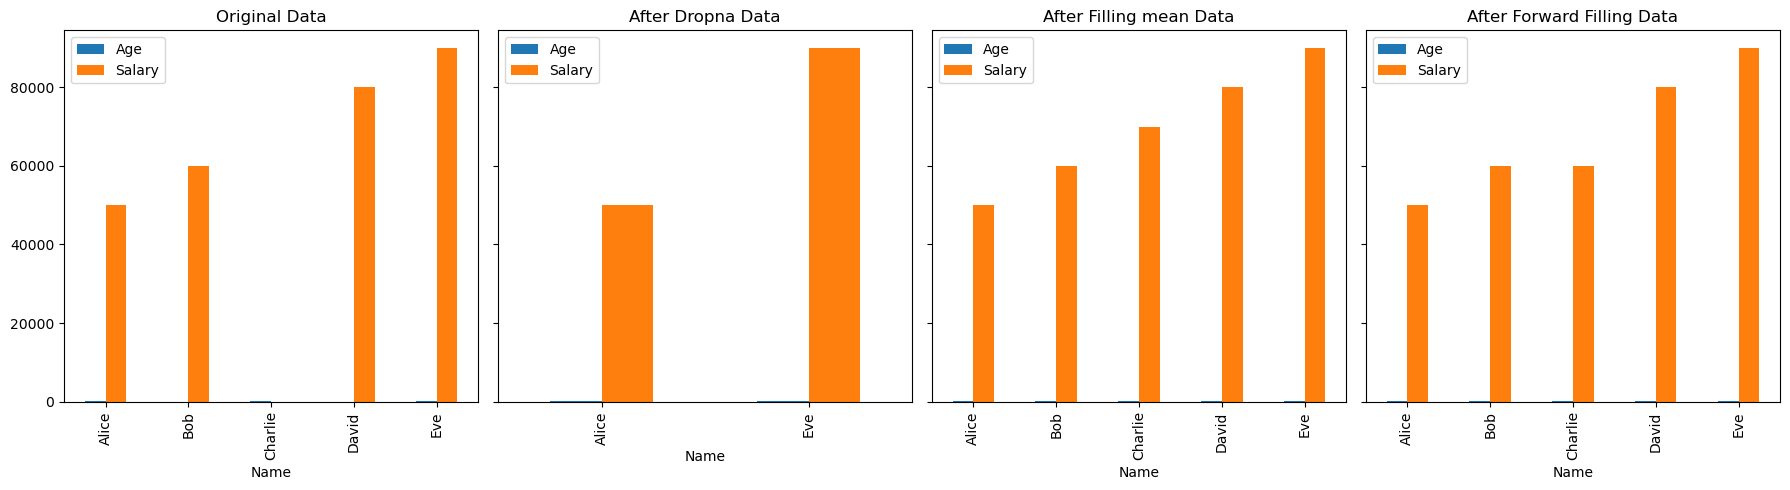

In [6]:
import matplotlib.pyplot as plt

# Create subplots to compare original vs cleaned data
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

# Plot original data...
df.plot(kind='bar', x='Name', y=['Age','Salary'], ax=axes[0], title='Original Data')

# Plot Dropped data...
df_dropna.plot(kind='bar', x='Name', y=['Age','Salary'], ax=axes[1], title='After Dropna Data')

# Plot filling mean data...
df_fillna_mean.plot(kind='bar', x='Name', y=['Age','Salary'], ax=axes[2], title='After Filling mean Data')

# Plot forward filling data...
df_ffill.plot(kind='bar', x='Name', y=['Age','Salary'], ax=axes[3], title='After Forward Filling Data')

# Show the plots...
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# creating a dataset with duplicates, missing values and outliers....
data = {
    "id": [101, 102, 103, 104, 105, 101],
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve","Alice"],
    "date": ["2023-01-01","2023-02-15","2023-03-20","2023-04-10","2023-05-05","2023-01-01"],
    "category": ["HR","IT","Finance","Marketing","HR","HR"],
    "Salary": [50000, 60000, 120000, 80000, 90000,50000]
}
df = pd.DataFrame(data)
# or
# df = pd.read_csv("Dataset_file.csv")
print(df)

    id     Name        date   category  Salary
0  101    Alice  2023-01-01         HR   50000
1  102      Bob  2023-02-15         IT   60000
2  103  Charlie  2023-03-20    Finance  120000
3  104    David  2023-04-10  Marketing   80000
4  105      Eve  2023-05-05         HR   90000
5  101    Alice  2023-01-01         HR   50000


In [21]:
# Task1: Detect and remove duplicates
# Check number of duplicate rows
print("\nTotal number of duplicated row: ",df.duplicated().sum())

# Remove duplicates rows
df.drop_duplicates(inplace=True)

print("\nDataFrame after removing duplicates: \n")
print(df)


Total number of duplicated row:  1

DataFrame after removing duplicates: 

    id     Name        date   category  Salary
0  101    Alice  2023-01-01         HR   50000
1  102      Bob  2023-02-15         IT   60000
2  103  Charlie  2023-03-20    Finance  120000
3  104    David  2023-04-10  Marketing   80000
4  105      Eve  2023-05-05         HR   90000


In [23]:
# Task 2: Convert Data Types
# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert 'category' column to lowercase
df['category'] = df['category'].str.lower()

print("\nDataFrame after converting data types: \n")
print(df)


DataFrame after converting data types: 

    id     Name       date   category  Salary
0  101    Alice 2023-01-01         hr   50000
1  102      Bob 2023-02-15         it   60000
2  103  Charlie 2023-03-20    finance  120000
3  104    David 2023-04-10  marketing   80000
4  105      Eve 2023-05-05         hr   90000


In [26]:
# Task 3: Handle Outliers using IQR
# Compute Q1, Q3 and IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Remove Outliers
df_clean = df[~((df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR)))]

print("\nDataFrame after removing outliers: \n")
print(df_clean)


DataFrame after removing outliers: 

    id     Name       date   category  Salary
0  101    Alice 2023-01-01         hr   50000
1  102      Bob 2023-02-15         it   60000
2  103  Charlie 2023-03-20    finance  120000
3  104    David 2023-04-10  marketing   80000
4  105      Eve 2023-05-05         hr   90000
